## read the csv file

In [22]:
import pandas as pd
import numpy as np
titanic=pd.read_csv("Titanic.csv")
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## print dataset information

In [51]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null object
survived      1309 non-null int64
name          1309 non-null object
sex           1309 non-null object
age           1046 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
ticket        1309 non-null object
fare          1308 non-null float64
cabin         295 non-null object
embarked      1307 non-null object
boat          486 non-null object
body          121 non-null float64
home.dest     745 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB
None


In [52]:
X=titanic[['pclass','sex','age','sibsp']]
Y=titanic['survived']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
pclass    1309 non-null object
sex       1309 non-null object
age       1046 non-null float64
sibsp     1309 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB


## deal with missing values

In [53]:
X['age'].fillna(X['age'].mean(),inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
pclass    1309 non-null object
sex       1309 non-null object
age       1309 non-null float64
sibsp     1309 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.0+ KB


D:\Anaconda\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## convert datatype

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['pclass'] = le.fit_transform(X['pclass'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
pclass    1309 non-null int64
sex       1309 non-null int64
age       1309 non-null float64
sibsp     1309 non-null int64
dtypes: float64(1), int64(3)
memory usage: 41.0 KB


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## divide training and test data and transform the characteristics of the data

In [55]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)

X_train = vec.fit_transform(X_train.to_dict(orient='record'))
print(vec.feature_names_)
X_test = vec.fit_transform(X_test.to_dict(orient='record'))

['age', 'pclass', 'sex', 'sibsp']


## build decision tree model

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,Y_train)
dtc.score(X_test, Y_test)
Y_predict = dtc.predict(X_test)

## print decision tree as pdf file

In [59]:
from sklearn.externals.six import StringIO
def creat_pdf(dtc, filename):
    dot_data = StringIO() 
    tree.export_graphviz(dtc, out_file=dot_data, feature_names = vec.get_feature_names(), class_names = ['died','survived'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    graph.write_pdf("%s.png" %filename)

## Get the confusion result matrix of training data and testing data

In [60]:
from sklearn import metrics
predict_train=dtc.predict(X_train)
result_train=metrics.confusion_matrix(Y_train,predict_train)
predict_test=dtc.predict(X_test)
result_test=metrics.confusion_matrix(Y_test,predict_test)

In [61]:
result_train,result_test

(array([[541,  22],
        [ 80, 273]], dtype=int64), array([[215,  31],
        [ 63,  84]], dtype=int64))

## print out the performance measures of the full model

In [62]:
print("The in-sample survivor accuracy is:%",100*result_train[1][1]/(result_train[1][1]+result_train[0][1]))
print("The in-sample victim accuracy is:%",100*result_train[0][0]/(result_train[0][0]+result_train[1][0]))
print("The out-sample survivor accuracy is:%",100*result_test[1][1]/(result_test[1][1]+result_test[0][1]))
print("The out-sample victim accuracy is:%",100*result_test[0][0]/(result_test[0][0]+result_test[1][0]))

The in-sample survivor accuracy is:% 92.5423728814
The in-sample victim accuracy is:% 87.1175523349
The out-sample survivor accuracy is:% 73.0434782609
The out-sample victim accuracy is:% 77.3381294964


## export decision tree into pdf file

In [63]:
import pydotplus
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data=StringIO()
tree.export_graphviz(dtc, out_file=dot_data, feature_names = vec.get_feature_names(), class_names = ['died','survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("DecisionTree.pdf")

True

## use cross‐validation to find the best parameter

In [64]:
from sklearn.model_selection import GridSearchCV
leaf_num=list(range(2,40))
misclass_num=[]
parameters = {'max_leaf_nodes':leaf_num}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), parameters, cv = 10,scoring = 'accuracy')
clf.fit(X_train, Y_train)
for score in clf.cv_results_['mean_test_score']:
     misclass_num.append((1-score)*1000)
print (clf.best_score_, clf.best_params_) 

0.806768558952 {'max_leaf_nodes': 7}


In [65]:
clf.best_params_['max_leaf_nodes']

7

## plot the figure

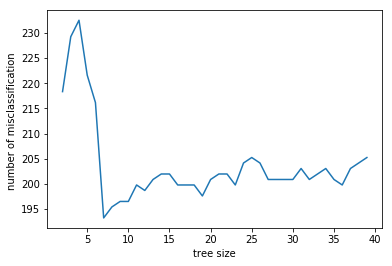

In [66]:
import matplotlib.pyplot as plt
plt.plot(leaf_num, misclass_num)
plt.xlabel("tree size")
plt.ylabel("number of misclassification ")
plt.show()

## get the pruned tree

In [67]:
new_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 7)
new_tree.fit(X_train,Y_train)
new_predict_train=new_tree.predict(X_train)
new_result_train=metrics.confusion_matrix(Y_train,new_predict_train)
new_predict_test=new_tree.predict(X_test)
new_result_test=metrics.confusion_matrix(Y_test,new_predict_test)
new_result_train,new_result_test

(array([[511,  52],
        [113, 240]], dtype=int64), array([[221,  25],
        [ 60,  87]], dtype=int64))

## report in‐sample and out‐of‐sample accuracy

In [68]:
print("in‐sample percent survivors correctly predicted is:%",100*new_result_train[1][1]/(new_result_train[1][1]+new_result_train[0][1]))
print("in-sample victims correctly predicted is:%",100*new_result_train[0][0]/(new_result_train[0][0]+new_result_train[1][0]))
print("out-sample survivors correctly predicted is:%",100*new_result_test[1][1]/(new_result_test[1][1]+new_result_test[0][1]))
print("out-sample victims correctly predicted is:%",100*new_result_test[0][0]/(new_result_test[0][0]+new_result_test[1][0]))

in‐sample percent survivors correctly predicted is:% 82.1917808219
in-sample victims correctly predicted is:% 81.891025641
out-sample survivors correctly predicted is:% 77.6785714286
out-sample victims correctly predicted is:% 78.6476868327


## export the new decision tree into pdf file

In [69]:
dot_data=StringIO()
tree.export_graphviz(new_tree, out_file=dot_data, feature_names = vec.get_feature_names(), class_names = ['died','survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("NewDecisionTree.pdf")

True

## After comparison,we can see that after prune the decision tree,the accuracy has improved.